In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Dados fornecidos
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

### Tratar os dados

In [26]:
# Transformar em DataFrame
dados_df = pd.DataFrame(dados_vendas)
# Converter os meses em número para o modelo
dados_df['mes_index'] = range(1, 13)
# Definindo as Features
X = dados_df[['mes_index']]
# Definindo o Target
y = dados_df['vendas']
# Dividindo em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, train_size=0.7, random_state=42, shuffle=False
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False
)


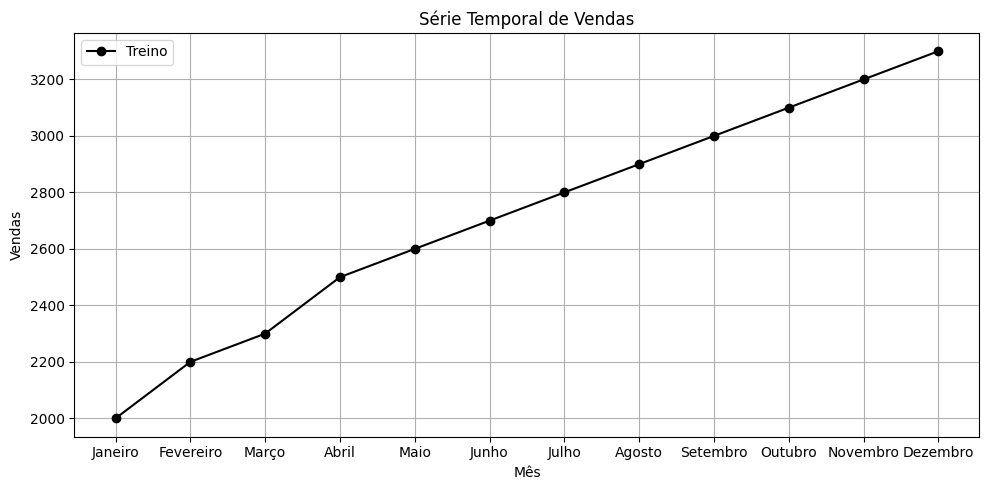

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(dados_df['mes'], dados_df['vendas'], color='black', label='Treino', marker='o')
plt.xticks(dados_df['mes'])
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Treinar Modelo

In [28]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

LinearRegression()

In [29]:
# Exibir os coeficientes do modelo
print(f"Intercepto: {reg_lin.intercept_}")
print(f"Coeficiente: {reg_lin.coef_}")
print(f'Equação: y = {reg_lin.coef_}x + {reg_lin.intercept_}')

Intercepto: 1932.1428571428569
Coeficiente: [126.19047619]
Equação: y = [126.19047619]x + 1932.1428571428569


### Previsão da Validação e Avaliação do Modelo (VALIDAÇÃO)

In [30]:
pred_val = reg_lin.predict(X_val)
mse = mean_squared_error(y_val, pred_val)
r2 = r2_score(y_val, pred_val)

print(f'MSE: {mse} \n R²: {r2}')

MSE: 6724.773242630424 
 R²: -1.6899092970521696


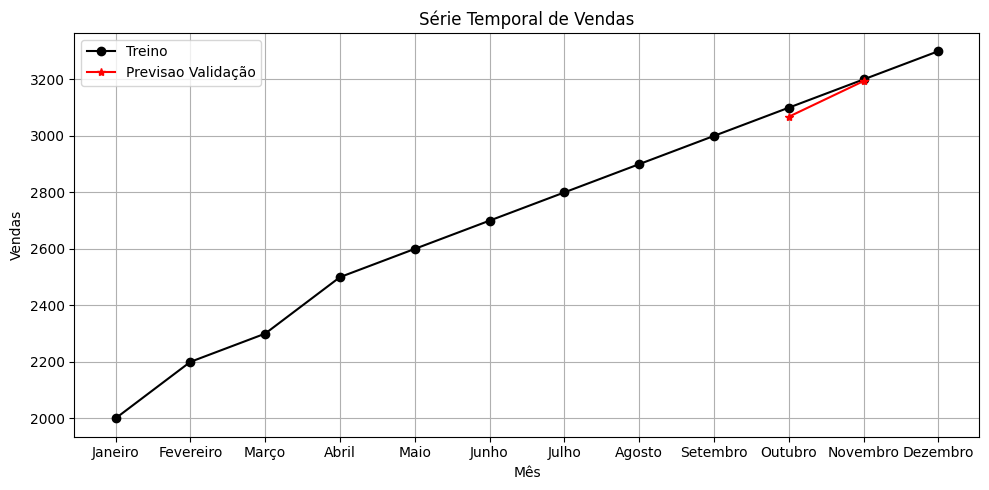

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(dados_df['mes'], dados_df['vendas'], color='black', label='Treino', marker='o')
plt.plot(X_val, pred_val, color='red', label='Previsao Validação', marker='*')
plt.xticks(dados_df['mes'])
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Previsão da Validação e Avaliação do Modelo (VALIDAÇÃO)

In [31]:
pred_test = reg_lin.predict(X_test)
mse = mean_squared_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)

print(f'MSE: {mse} \n R²: {r2}')

MSE: 17949.263038548794 
 R²: -6.179705215419517


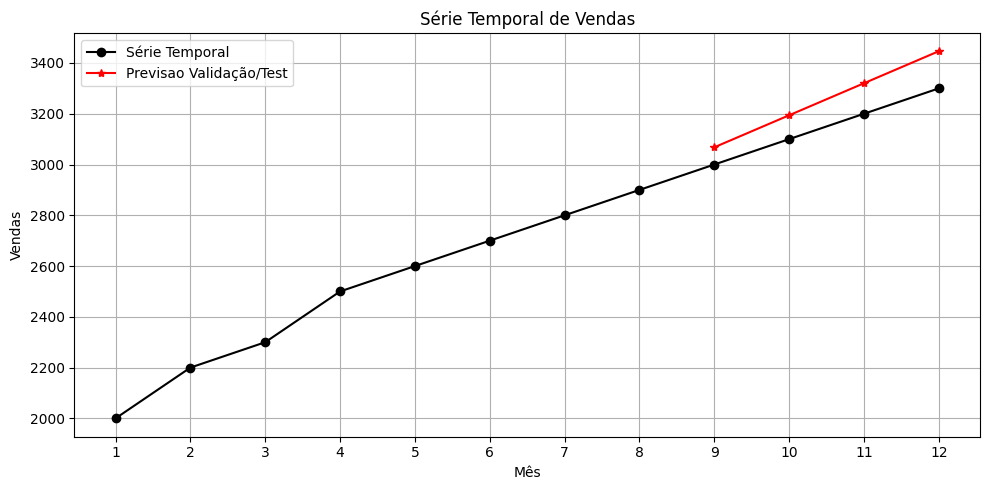

In [58]:
x_val_test = pd.concat([X_val['mes_index'], X_test['mes_index']])
pred_val_test = pd.concat([pd.Series(pred_val), pd.Series(pred_test)])
plt.figure(figsize=(10, 5))
plt.plot(dados_df['mes_index'], dados_df['vendas'], color='black', label='Série Temporal', marker='o')
plt.plot(x_val_test, pred_val_test, color='red', label='Previsao Validação/Test', marker='*')
plt.xticks(dados_df['mes_index'])
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Previsão de Venda de Dezembro

In [32]:
pred_dez = reg_lin.predict(pd.DataFrame({'mes_index':[12]}))
print(f'VALOR PREVISTO PARA DEZEMBRO: {pred_dez[0]:.2f}\n'
      f'VALOR REAL: {dados_df['vendas'].tail(1)}')

VALOR PREVISTO PARA DEZEMBRO: 3446.43
VALOR REAL: 11    3300
Name: vendas, dtype: int64


### Plots

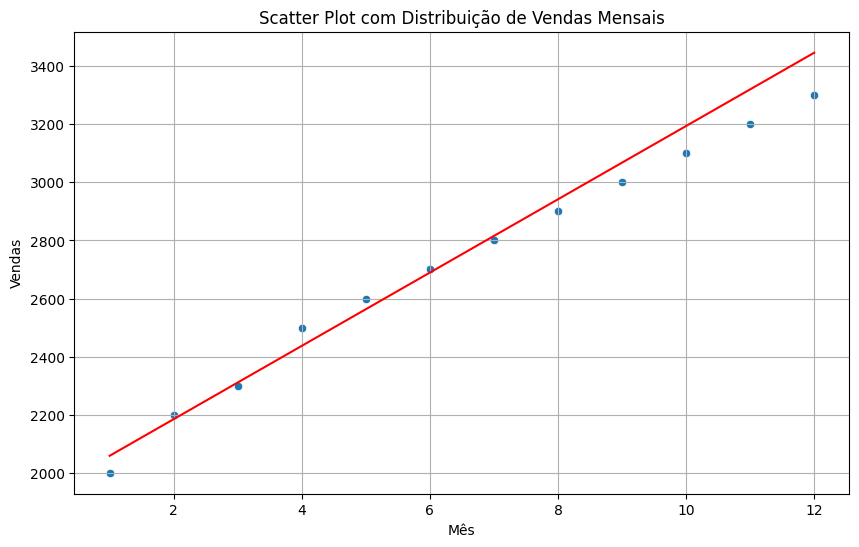

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_index', y='vendas', data=dados_df)
plt.plot(dados_df['mes_index'], reg_lin.predict(dados_df[['mes_index']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

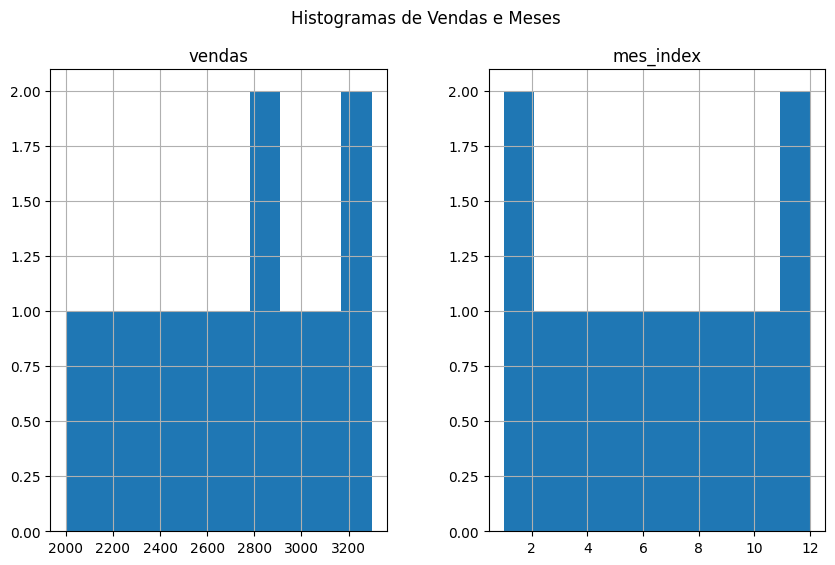

In [62]:
dados_df.hist(bins=10, figsize=(10, 6), grid=True)
plt.suptitle('Histogramas de Vendas e Meses')
plt.show()